In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from datetime import datetime
import collections
import re

import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
# !ls -l 'mbsa.zip'

In [4]:
# import zipfile
# zip_file = zipfile.ZipFile('mbsa.zip')
# zip_file.extractall()

In [5]:
!ls -l

total 4208564
-rw-r--r-- 1 lab07 multi     296721 Nov  8 15:54 '(eng) sentiment analysis_mbsa.ipynb'
-rw-r--r-- 1 lab07 multi 3127087532 Nov  8 09:23  mbsa.csv
-rw-r--r-- 1 lab07 multi 1182141602 Nov  8 09:18  mbsa.zip
drwxr-xr-x 4 lab07 multi       4096 Nov  8 09:22  nltk_data
-rw------- 1 lab07 multi      17826 Nov  8 15:55  nohup.out


In [6]:
mbsa = pd.read_csv('mbsa.csv')
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344048 entries, 0 to 19344047
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Date       object
 1   text       object
 2   Sentiment  object
dtypes: object(3)
memory usage: 442.8+ MB


In [7]:
mbsa = mbsa[mbsa['Sentiment'].notnull()]
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18452904 entries, 0 to 19344047
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Date       object
 1   text       object
 2   Sentiment  object
dtypes: object(3)
memory usage: 563.1+ MB


In [8]:
mbsa['Sentiment'].value_counts()

Negative    9729297
Positive    8723207
Neutral         400
Name: Sentiment, dtype: int64

In [9]:
neg = mbsa[mbsa['Sentiment'] == 'Negative'][:10000]
pos = mbsa[mbsa['Sentiment'] == 'Positive'][:10000]
neu = mbsa[mbsa['Sentiment'] == 'Neutral']

In [10]:
neg

,Date,text,Sentiment
77949,2019-05-21,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",Negative
77950,2019-05-21,IDAX #Japan #エアドロップ\n\n海外取引所 #IDAX 日本語アカウントのオー...,Negative
77951,2019-05-21,Multiply your Bitcoin and Ethereum: https://t...,Negative
77952,2019-05-21,Game of DOGEs begun! Become a champion of the ...,Negative
77953,2019-05-21,"$BTC levels \n\nSupport: 7600, 7200, 6800, 640...",Negative
...,...,...,...
87944,2019-05-21,@gainbtsmuttuals Join me on https://t.co/UkDeH...,Negative
87945,2019-05-21,Interested in winning big ?? Call or text 0902...,Negative
87946,2019-05-21,And the price doesn't care. Bitcoin is still c...,Negative
87947,2019-05-21,My appetite for Risks is very high \nI would l...,Negative


In [11]:
result = pd.concat([neg, pos, neu])
result

,Date,text,Sentiment
77949,2019-05-21,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",Negative
77950,2019-05-21,IDAX #Japan #エアドロップ\n\n海外取引所 #IDAX 日本語アカウントのオー...,Negative
77951,2019-05-21,Multiply your Bitcoin and Ethereum: https://t...,Negative
77952,2019-05-21,Game of DOGEs begun! Become a champion of the ...,Negative
77953,2019-05-21,"$BTC levels \n\nSupport: 7600, 7200, 6800, 640...",Negative
...,...,...,...
5399594,2017-02-28,$1199.87 at 01:15 UTC [24h Range: $1169.00 - $...,Neutral
5399595,2017-02-28,$1206.00 #bitfinex;\n$1206.20 #GDAX;\n$1185.00...,Neutral
5399596,2017-02-28,1 #BTC (#Bitcoin) quotes:\n$1199.83/$1199.89 #...,Neutral
5399597,2017-02-28,One Bitcoin now worth $1199.88@bitstamp. High ...,Neutral


In [12]:
result['Sentiment'].value_counts()

Negative    10000
Positive    10000
Neutral       400
Name: Sentiment, dtype: int64

In [13]:
ticker_pattern = re.compile(r'(^\$[A-Z]+|^\$ES_F)')
ht_pattern = re.compile(r'#\w+')

ticker_dic = collections.defaultdict(int)
ht_dic = collections.defaultdict(int)

for text in result['text']:
    for word in text.split():
        if ticker_pattern.fullmatch(word) is not None:
            ticker_dic[word[1:]] += 1

            word = word.lower()
            if ht_pattern.fullmatch(word) is not None:
                ht_dic[word] += 1

In [14]:
charonly = re.compile(r'[^a-zA-Z\s]')
handle_pattern = re.compile(r'@\w+')
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
url_pattern = re.compile(
    'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
pic_pattern = re.compile('pic\.twitter\.com/.{10}')
special_code = re.compile(r'(&amp;|&gt;|&lt;)')
tag_pattern = re.compile(r'<.*?>')

STOPWORDS = set(stopwords.words('english')).union(
    {'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

lemmatizer = WordNetLemmatizer()

def hashtag(phrase):
    return ht_pattern.sub(' ', phrase)

def remove_ticker(phrase):
    return ticker_pattern.sub('', phrase)
    
def specialcode(phrase):
    return special_code.sub(' ', phrase)

def emoji(phrase):
    return emoji_pattern.sub(' ', phrase)

def url(phrase):
    return url_pattern.sub('', phrase)

def pic(phrase):
    return pic_pattern.sub('', phrase)

def html_tag(phrase):
    return tag_pattern.sub(' ', phrase)

def handle(phrase):
    return handle_pattern.sub('', phrase)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # DIS, ticker symbol of Disney, is interpreted as the plural of "DI" 
    # in WordCloud, so I converted it to Disney
    phrase = re.sub('DIS', 'Disney', phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"(he|He)\'s", "he is", phrase)
    phrase = re.sub(r"(she|She)\'s", "she is", phrase)
    phrase = re.sub(r"(it|It)\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"(\'ve|has)", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def onlychar(phrase):
    return charonly.sub('', phrase)

def remove_stopwords(phrase):
    return " ".join([word for word in str(phrase).split()\
                     if word not in STOPWORDS])

def tokenize_stem(phrase):   
    tokens = word_tokenize(phrase)
    stem_words =[]
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        stem_words.append(word)        
    buf = ' '.join(stem_words)    
    return buf

In [15]:
def arrange_text(ds):
    ds['text2'] = ds['text'].apply(emoji)
    ds['text2'] = ds['text2'].apply(handle)
    ds['text2'] = ds['text2'].apply(specialcode)
    ds['text2'] = ds['text2'].apply(hashtag)
    ds['text2'] = ds['text2'].apply(url)
    ds['text2'] = ds['text2'].apply(pic)
    ds['text2'] = ds['text2'].apply(html_tag)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(decontracted)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(tokenize_stem)
    ds['text2'] = ds['text2'].apply(remove_stopwords)

In [16]:
# !pip install tqdm
# from tqdm import trange, notebook
# for page in notebook.tqdm(range(100000)):
arrange_text(result)
result.head()

,Date,text,Sentiment,text2
77949,2019-05-21,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",Negative,BTC IS STILL GOING STRONG Thus giving away BTC...
77950,2019-05-21,IDAX #Japan #エアドロップ\n\n海外取引所 #IDAX 日本語アカウントのオー...,Negative,IDAX BTC Idax
77951,2019-05-21,Multiply your Bitcoin and Ethereum: https://t...,Negative,Multiply Bitcoin Ethereum
77952,2019-05-21,Game of DOGEs begun! Become a champion of the ...,Negative,Game DOGEs begun Become champion Lord Duck get...
77953,2019-05-21,"$BTC levels \n\nSupport: 7600, 7200, 6800, 640...",Negative,BTC level Support Resistance moon


In [17]:
result = result[result['Sentiment'].notnull()]
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20400 entries, 77949 to 5399598
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       20400 non-null  object
 1   text       20400 non-null  object
 2   Sentiment  20400 non-null  object
 3   text2      20400 non-null  object
dtypes: object(4)
memory usage: 796.9+ KB


In [18]:
result = result.replace({'Sentiment': 'Positive'}, {'Sentiment': 0})
result = result.replace({'Sentiment': 'Neutral'}, {'Sentiment': 1})
result = result.replace({'Sentiment': 'Negative'}, {'Sentiment': 2})

result.head()

,Date,text,Sentiment,text2
77949,2019-05-21,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",2,BTC IS STILL GOING STRONG Thus giving away BTC...
77950,2019-05-21,IDAX #Japan #エアドロップ\n\n海外取引所 #IDAX 日本語アカウントのオー...,2,IDAX BTC Idax
77951,2019-05-21,Multiply your Bitcoin and Ethereum: https://t...,2,Multiply Bitcoin Ethereum
77952,2019-05-21,Game of DOGEs begun! Become a champion of the ...,2,Game DOGEs begun Become champion Lord Duck get...
77953,2019-05-21,"$BTC levels \n\nSupport: 7600, 7200, 6800, 640...",2,BTC level Support Resistance moon


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(result['text2'], result['Sentiment'],
                                                    test_size = 0.2,
                                                    random_state = 777,
                                                    stratify = result['Sentiment'])

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16320,), (16320,), (4080,), (4080,))

In [21]:
y_test.value_counts()

2    2000
0    2000
1      80
Name: Sentiment, dtype: int64

In [22]:
sentences = [sentence.split(' ') for sentence in x_train]

In [23]:
sentences

[['BTC', 'Flyer'],
 ['yln', 'en', 'yksek', 'seviyesinde', 'srada', 'dolar', 'var'],
 ['BaknzAz',
  'nce',
  'bi',
  'sefili',
  'daha',
  'BLOCKLADIM',
  'Szde',
  'BELENSAY',
  'Dostu',
  'YTD'],
 ['The',
  'Bitcoin',
  'BTC',
  'price',
  'currently',
  'USD',
  'EUR',
  'Its',
  'number',
  'cryptocurrency',
  'Earth',
  'market',
  'capitalization',
  'million',
  'USD',
  'Last',
  'change',
  'h',
  'h'],
 ['I', 'red', 'btc', 'sir', 'We', 'together', 'lmao'],
 ['PrimeXBT',
  'BTC',
  'KNC',
  'GNT',
  'AION',
  'PAY',
  'TRX',
  'ZEC',
  'NXT',
  'NXT',
  'CRO',
  'DGB'],
 ['L', 'BTC', 'S'],
 ['Twitter'],
 ['BTC', 'ETH', 'XRP', 'BCH', 'EOS', 'EOS'],
 ['LTCUsD',
  'sideways',
  'doe',
  'look',
  'weak',
  'LTC',
  'since',
  'call',
  'day',
  'ago',
  'I',
  'play',
  'LTCBTC',
  'right'],
 ['Crypto',
  'News',
  'FCA',
  'Currency',
  'Crypto',
  'Scams',
  'Hit',
  'BitMEXs',
  'Insurance',
  'Fund',
  'Now',
  'Has',
  'Over',
  'Million',
  'Bitcoin',
  'SEC',
  'delayed',
 

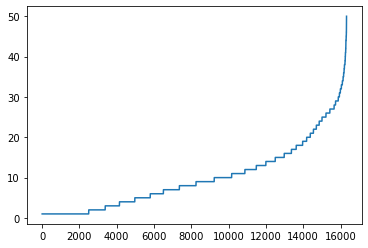

In [24]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

# print(sum([int(i <= 25) for i in sentence_len]))

In [25]:
max(sentence_len)

50

In [26]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)

train_X = pad_sequences(train_X, padding = 'post')

print(train_X[:5])

[[   1 8067    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [3754   44 2612 3755 4449  950 1702    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [8068 4450 2227 8069 1138 8070 8071 1827 8072  597    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  10    2    1    4  292    3  278   95  316   62 2069   14 2228  355
     3   49   60   29   29    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 

In [27]:
train_X.shape

(16320, 50)

In [28]:
print(tokenizer.index_word[17500])
print(tokenizer.index_word[3000])

temp = tokenizer.texts_to_sequences(['yln', 'en', 'yksek', 'seviyesinde', 'srada'])
print(temp)

temp = pad_sequences(temp, padding = 'post')
print(temp)

laughable
commercial
[[3754], [44], [2612], [3755], [4449]]
[[3754]
 [  44]
 [2612]
 [3755]
 [4449]]


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Embedding(20000, 300, input_length = 50))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.LSTM(128))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error',
              optimizer = Adam(0.001),
              metrics = ['accuracy'])

model.summary()

In [ ]:
def model_fn():

    LR = Choice('learning_rate', [0.001, 0.0005, 0.0001], group='optimizer')
    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
    NUM_DIMS = Range('num_dims', 8, 32, 8, group='dense')
    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')
    L2_NUM_FILTERS = Range('l2_num_filters', 8, 64, 8, group='cnn')
    L1_NUM_FILTERS = Range('l1_num_filters', 8, 64, 8, group='cnn')

    model = Sequential()
    model.add(Conv2D(L1_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(L2_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    for _ in range(NUM_LAYERS):
        model.add(Dense(NUM_DIMS, activation='relu'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))

    return model

In [ ]:
tuner = Tuner(model_fn, 'val_accuracy', epoch_budget=500, max_epochs=5)
tuner.search(train_X, y_train, validation_split = 0.2)

In [58]:
from tensorflow.keras.preprocessing import sequence

max_features = 20000
max_len = 50

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(64, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
# model.add(layers.Conv1D(64, 7, activation = 'relu'))
# model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=Adam(lr=5e-3),
             loss='mean_squared_error',
             metrics=['acc'])
history = model.fit(train_X, y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 128)           2560000   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 44, 64)            57408     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 8, 64)             0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 2, 32)             14368     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 2,631,809
Trainable params: 2,631,809
Non-trainable params: 0
___________________________________________

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100).to_list(),
    'learning_rate': reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data = )

In [49]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import SGD

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(1))
    optimizer = SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [50]:
keras_reg = tensorflow.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

keras_reg.fit(train_X, y_train, epochs=100,
             validation_split = 0.2)

Epoch 1/100


ValueError: in user code:

    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:820 train_function  *
        return step_function(self, iterator)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:810 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:803 run_step  **
        outputs = model.train_step(data)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:753 train_step
        y_pred = self(x, training=True, step_not_overridden=True)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:990 __call__
        self.name)
    /home/ubuntu/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_14 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape [32, 50]


In [ ]:
history = model.fit(train_X, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

In [ ]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
sentences = [sentence.split(' ') for sentence in x_test]

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding = 'post')

model.evaluate(test_X, y_test, verbose = 0)